import ip2vec

In [3]:
import pandas as pd
import numpy as np
from model import ip2vec 
from preprocess import Preprocess

dataset 재구성

In [11]:
# data upload
file_path = r'file_path'
mta_df = pd.read_csv(file_path)

In [13]:
df = mta_df[['source','destination','src_port','dst_port','prot']].copy()

In [10]:
df.head()

,source,destination,dst_port,prot
0,10.6.2.101,10.6.2.1,53,17
1,10.6.2.101,143.95.239.62,80,6
2,10.6.2.101,185.141.25.23,443,6
3,10.6.2.101,185.141.25.23,443,6
4,10.6.2.101,147.32.5.111,8043,6


In [8]:
del mta_df

단방향 플로우 만들기

In [14]:
copy_df = df[['prot']].copy()
copy_df['source'] = df['destination'].copy()
copy_df['dst_port'] = df['src_port'].copy()
copy_df['destination'] = df['source'].copy()

In [15]:
df.drop(columns=['src_port'],inplace=True)

In [16]:
copy_df = copy_df.reindex(columns=['source','destination','dst_port','prot'])
df_all = pd.concat([df,copy_df])

In [17]:
df_all[:5]

,source,destination,dst_port,prot
0,10.6.2.101,10.6.2.1,53,17
1,10.6.2.101,143.95.239.62,80,6
2,10.6.2.101,185.141.25.23,443,6
3,10.6.2.101,185.141.25.23,443,6
4,10.6.2.101,147.32.5.111,8043,6


In [18]:
df_all = df_all.drop_duplicates()

preprocess

In [19]:
flows = df_all.values
word_to_id = {}
window_size = 4

In [20]:
i=0
for row in df_all.values:
    for item in row:
        if item not in word_to_id:
            word_to_id[item] = i
            i+=1

In [21]:
len(word_to_id)

34

In [22]:
len(df_all)

27

In [23]:
preprocessor = Preprocess(flows, word_to_id, window_size)
X_train, y_train = preprocessor.generate_training_data()

In [24]:
X_train[0]

array([ 0,  0,  0,  1,  1,  2,  2,  3,  3,  3,  0,  0,  0,  4,  4,  5,  5,
        6,  6,  6,  0,  0,  0,  7,  7,  8,  8,  6,  6,  6,  0,  0,  0,  9,
        9, 10, 10,  6,  6,  6,  0,  0,  0, 11, 11,  8,  8,  6,  6,  6,  0,
        0,  0, 12, 12,  8,  8,  6,  6,  6,  0,  0,  0, 13, 13,  8,  8,  6,
        6,  6,  0,  0,  0, 14, 14,  8,  8,  6,  6,  6,  0,  0,  0, 15, 15,
        8,  8,  6,  6,  6,  0,  0,  0, 16, 16,  8,  8,  6,  6,  6,  1,  1,
        1,  0,  0, 17, 17,  3,  3,  3,  4,  4,  4,  0,  0, 18, 18,  6,  6,
        6,  7,  7,  7,  0,  0, 19, 19,  6,  6,  6,  7,  7,  7,  0,  0, 20,
       20,  6,  6,  6,  9,  9,  9,  0,  0, 21, 21,  6,  6,  6,  9,  9,  9,
        0,  0, 22, 22,  6,  6,  6,  9,  9,  9,  0,  0, 23, 23,  6,  6,  6,
        9,  9,  9,  0,  0, 24, 24,  6,  6,  6, 11, 11, 11,  0,  0, 25, 25,
        6,  6,  6, 11, 11, 11,  0,  0, 26, 26,  6,  6,  6, 12, 12, 12,  0,
        0, 27, 27,  6,  6,  6, 13, 13, 13,  0,  0, 28, 28,  6,  6,  6, 14,
       14, 14,  0,  0, 29

In [25]:
y_train[0]

array([ 1,  2,  3,  2,  3,  1,  3,  0,  1,  2,  4,  5,  6,  5,  6,  4,  6,
        0,  4,  5,  7,  8,  6,  8,  6,  7,  6,  0,  7,  8,  9, 10,  6, 10,
        6,  9,  6,  0,  9, 10, 11,  8,  6,  8,  6, 11,  6,  0, 11,  8, 12,
        8,  6,  8,  6, 12,  6,  0, 12,  8, 13,  8,  6,  8,  6, 13,  6,  0,
       13,  8, 14,  8,  6,  8,  6, 14,  6,  0, 14,  8, 15,  8,  6,  8,  6,
       15,  6,  0, 15,  8, 16,  8,  6,  8,  6, 16,  6,  0, 16,  8,  0, 17,
        3, 17,  3,  0,  3,  1,  0, 17,  0, 18,  6, 18,  6,  0,  6,  4,  0,
       18,  0, 19,  6, 19,  6,  0,  6,  7,  0, 19,  0, 20,  6, 20,  6,  0,
        6,  7,  0, 20,  0, 21,  6, 21,  6,  0,  6,  9,  0, 21,  0, 22,  6,
       22,  6,  0,  6,  9,  0, 22,  0, 23,  6, 23,  6,  0,  6,  9,  0, 23,
        0, 24,  6, 24,  6,  0,  6,  9,  0, 24,  0, 25,  6, 25,  6,  0,  6,
       11,  0, 25,  0, 26,  6, 26,  6,  0,  6, 11,  0, 26,  0, 27,  6, 27,
        6,  0,  6, 12,  0, 27,  0, 28,  6, 28,  6,  0,  6, 13,  0, 28,  0,
       29,  6, 29,  6,  0

In [26]:
vocab_size = len(word_to_id)

In [27]:
Y = np.eye(vocab_size)[y_train[0]]

In [28]:
import torch

In [29]:
tensor_data = torch.tensor(Y)

trans_ = torch.transpose(tensor_data,0,1)

#numpy = trans_.numpy()

In [30]:
trans_.shape

torch.Size([34, 270])

In [31]:
Y.shape

(270, 34)

In [32]:
y_train[0]

array([ 1,  2,  3,  2,  3,  1,  3,  0,  1,  2,  4,  5,  6,  5,  6,  4,  6,
        0,  4,  5,  7,  8,  6,  8,  6,  7,  6,  0,  7,  8,  9, 10,  6, 10,
        6,  9,  6,  0,  9, 10, 11,  8,  6,  8,  6, 11,  6,  0, 11,  8, 12,
        8,  6,  8,  6, 12,  6,  0, 12,  8, 13,  8,  6,  8,  6, 13,  6,  0,
       13,  8, 14,  8,  6,  8,  6, 14,  6,  0, 14,  8, 15,  8,  6,  8,  6,
       15,  6,  0, 15,  8, 16,  8,  6,  8,  6, 16,  6,  0, 16,  8,  0, 17,
        3, 17,  3,  0,  3,  1,  0, 17,  0, 18,  6, 18,  6,  0,  6,  4,  0,
       18,  0, 19,  6, 19,  6,  0,  6,  7,  0, 19,  0, 20,  6, 20,  6,  0,
        6,  7,  0, 20,  0, 21,  6, 21,  6,  0,  6,  9,  0, 21,  0, 22,  6,
       22,  6,  0,  6,  9,  0, 22,  0, 23,  6, 23,  6,  0,  6,  9,  0, 23,
        0, 24,  6, 24,  6,  0,  6,  9,  0, 24,  0, 25,  6, 25,  6,  0,  6,
       11,  0, 25,  0, 26,  6, 26,  6,  0,  6, 11,  0, 26,  0, 27,  6, 27,
        6,  0,  6, 12,  0, 27,  0, 28,  6, 28,  6,  0,  6, 13,  0, 28,  0,
       29,  6, 29,  6,  0

In [33]:
np.eye(vocab_size)[y_train[0]]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
X_train[0].shape[0]

270

In [36]:
emb_size = X_train[0].shape[0]

In [37]:
X_train.shape

(1, 270)

In [38]:
Y.shape

(270, 34)

1
1
Cost after epoch 0: 6.985921563957013
{'WRD_EMB': array([[ 0.00641253,  0.02146886, -0.00868642, ..., -0.01731212,
        -0.00061032,  0.00293797],
       [ 0.00978194,  0.01452107, -0.00400282, ...,  0.00226595,
         0.01721814,  0.00126436],
       [-0.00567374,  0.00634228,  0.00451803, ..., -0.0064377 ,
        -0.00514514, -0.00266442],
       ...,
       [ 0.02264513, -0.00779379, -0.01276114, ...,  0.011877  ,
         0.00775502,  0.00015998],
       [-0.00434755, -0.01373933, -0.0073022 , ..., -0.00716515,
         0.01124199,  0.00233009],
       [-0.0137326 ,  0.00078333,  0.00693507, ...,  0.00519663,
        -0.01455713, -0.02211812]]), 'W': array([[-0.02445532, -0.01418724,  0.01130856, ..., -0.00897948,
         0.00779099, -0.00584423],
       [ 0.02353665, -0.00048092, -0.00459308, ..., -0.00876235,
        -0.00977946, -0.01065886],
       [ 0.00702072,  0.00304094, -0.02174294, ..., -0.003751  ,
         0.00074669, -0.00044829],
       ...,
       [-0.0147

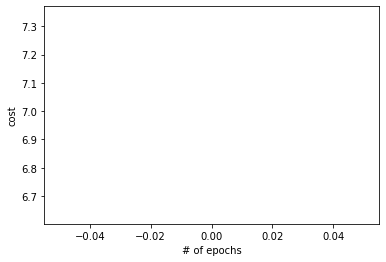

In [42]:
model = ip2vec(vocab_size,vocab_size)

# 예시 데이터와 하이퍼파라미터 설정
#X = np.array([[0, 1, 2, 3, 4, 5, 6, 7]])  # 입력 단어의 인덱스들
#Y = np.eye(vocab_size)[X]  # 레이블을 원-핫 인코딩으로 변환 
learning_rate = 0.01
epochs = 1

# 모델 학습
trained_parameters = model.skipgram_model_training(X_train,Y.T, vocab_size, vocab_size, learning_rate, epochs) # 두번째 vocab_size는 embedd size

# 학습된 파라미터 확인                       
print(trained_parameters)                 

In [43]:
trained_parameters

{'WRD_EMB': array([[ 0.00641253,  0.02146886, -0.00868642, ..., -0.01731212,
         -0.00061032,  0.00293797],
        [ 0.00978194,  0.01452107, -0.00400282, ...,  0.00226595,
          0.01721814,  0.00126436],
        [-0.00567374,  0.00634228,  0.00451803, ..., -0.0064377 ,
         -0.00514514, -0.00266442],
        ...,
        [ 0.02264513, -0.00779379, -0.01276114, ...,  0.011877  ,
          0.00775502,  0.00015998],
        [-0.00434755, -0.01373933, -0.0073022 , ..., -0.00716515,
          0.01124199,  0.00233009],
        [-0.0137326 ,  0.00078333,  0.00693507, ...,  0.00519663,
         -0.01455713, -0.02211812]]),
 'W': array([[-0.02445532, -0.01418724,  0.01130856, ..., -0.00897948,
          0.00779099, -0.00584423],
        [ 0.02353665, -0.00048092, -0.00459308, ..., -0.00876235,
         -0.00977946, -0.01065886],
        [ 0.00702072,  0.00304094, -0.02174294, ..., -0.003751  ,
          0.00074669, -0.00044829],
        ...,
        [-0.01476896, -0.01009257, -0.

In [44]:
trained_parameters['WRD_EMB'].shape

(34, 34)

In [45]:
trained_parameters['W'].shape

(34, 34)